In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

num_steps = 300          # Total number of steps in the Markov chain
initial_x = 5            # Initial value x[1] = 5
phi = 0.9                # Coefficient for x[k]
sigma_v = np.sqrt(0.19)  # Standard deviation of v[k]

x = np.zeros(num_steps)
x[0] = initial_x

# Generate random noise v[k] ~ N(0, 0.19)
v = np.random.normal(0, sigma_v, num_steps - 1)

# Simulate the Markov chain
for k in range(1, num_steps):
    x[k] = phi * x[k-1] + v[k-1]

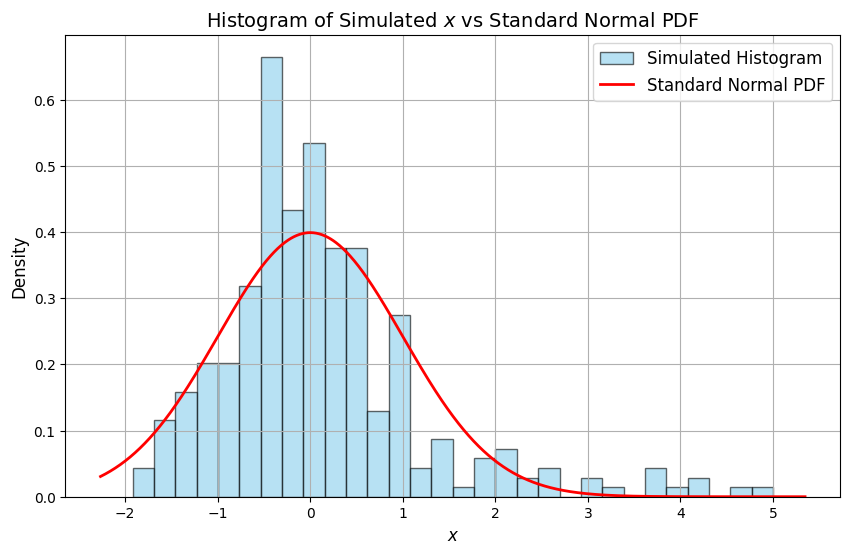

In [59]:
# 2. Histogram Plotting and Comparison

# Create a histogram of the simulated x values
plt.figure(figsize=(10, 6))
plt.hist(x, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Simulated Histogram')

# Overlay the standard normal PDF
xmin, xmax = plt.xlim()
x_vals = np.linspace(xmin, xmax, 1000)
plt.plot(x_vals, norm.pdf(x_vals, 0, 1), 'r', linewidth=2, label='Standard Normal PDF')

plt.title('Histogram of Simulated $x$ vs Standard Normal PDF', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

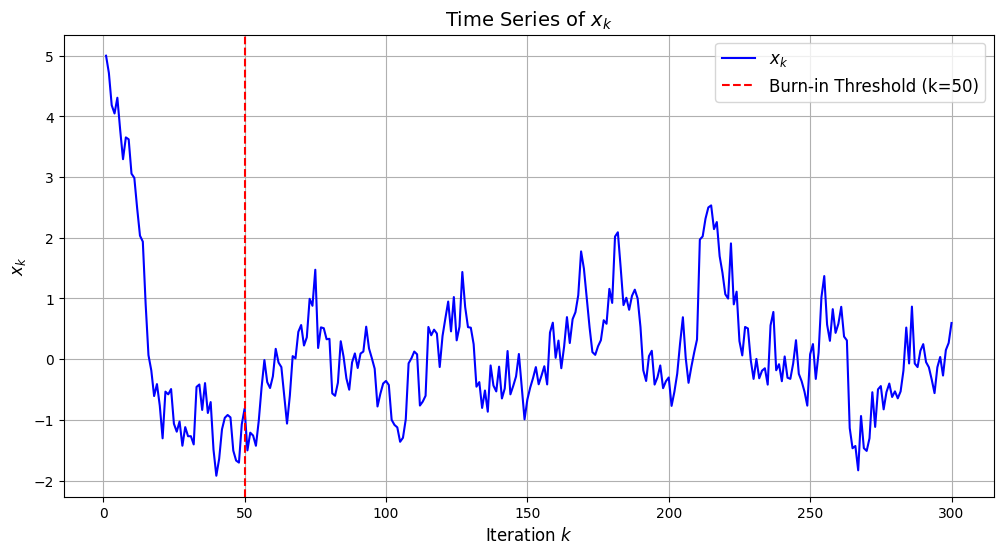

In [60]:
# 3. Time Series Plot and Burn-in Period Determination

# Plot the time series of x[k]
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_steps + 1), x, label='$x_k$', color='blue')

burn_in = 50
plt.axvline(x=burn_in, color='red', linestyle='--', label=f'Burn-in Threshold (k={burn_in})')

plt.title('Time Series of $x_k$', fontsize=14)
plt.xlabel('Iteration $k$', fontsize=12)
plt.ylabel('$x_k$', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [61]:
post_burn_in = x[burn_in:]
mean_post_burn_in = np.mean(post_burn_in)
variance_post_burn_in = np.var(post_burn_in)

print(f"Mean after burn-in (k > {burn_in}): {mean_post_burn_in:.4f}")
print(f"Variance after burn-in (k > {burn_in}): {variance_post_burn_in:.4f}")

Mean after burn-in (k > 50): 0.0750
Variance after burn-in (k > 50): 0.6161


In [62]:
# 1
import numpy as np

def p(x):
    return np.sqrt(2) / np.sqrt(np.pi * (1 + (x - 1)**2)) * \
           np.exp(-0.5 * (3 + 2 * np.arcsinh(x - 1))**2)

# Proposal distribution: Standard Normal
L = 1000
samples = np.random.normal(0, 1, L)
q = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * samples**2)

# Compute weights
weights = p(samples) / q
weights /= np.sum(weights)  # Normalize weights


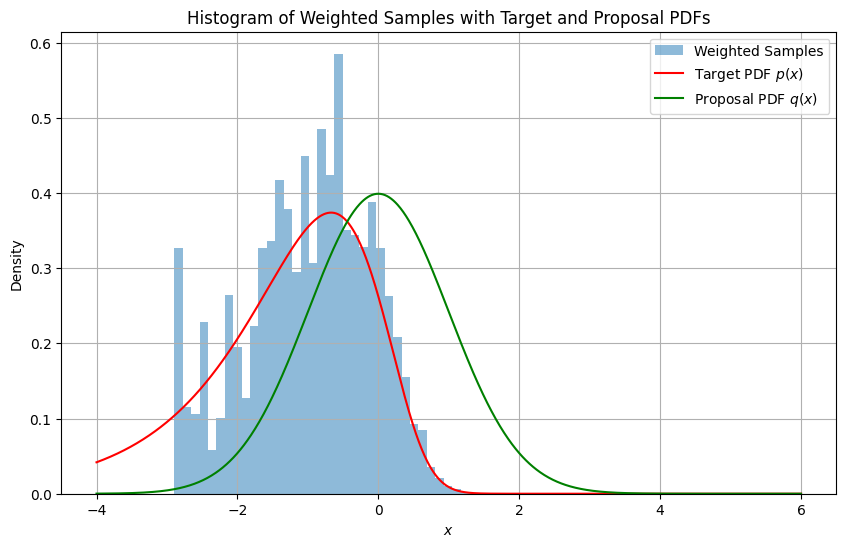

In [63]:
# 2

import matplotlib.pyplot as plt

x = np.linspace(-4, 6, 1000)
p_x = p(x)
q_x = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, weights=weights, alpha=0.5, label='Weighted Samples')

plt.plot(x, p_x, 'r-', label='Target PDF $p(x)$')

plt.plot(x, q_x, 'g-', label='Proposal PDF $q(x)$')

plt.title('Histogram of Weighted Samples with Target and Proposal PDFs')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

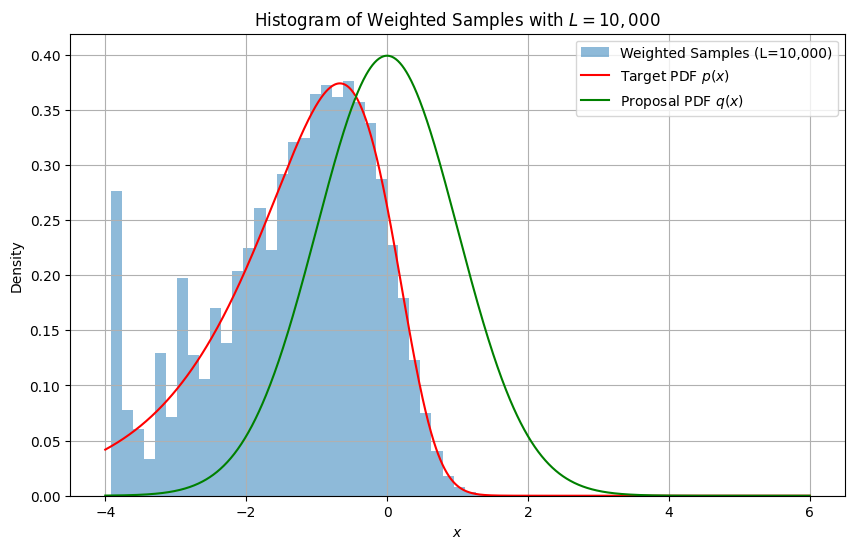

In [64]:
# 3
L = 10000
samples = np.random.normal(0, 1, L)
q = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * samples**2)

weights = p(samples) / q
weights /= np.sum(weights)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, weights=weights, alpha=0.5, label='Weighted Samples (L=10,000)')
plt.plot(x, p_x, 'r-', label='Target PDF $p(x)$')
plt.plot(x, q_x, 'g-', label='Proposal PDF $q(x)$')
plt.title('Histogram of Weighted Samples with $L=10,000$')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

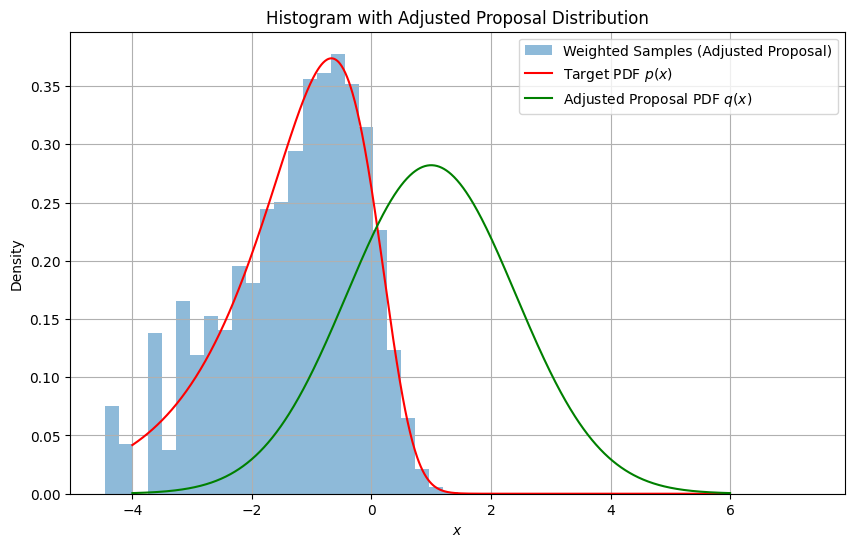

In [65]:
# 4
# Adjusted Proposal Distribution: N(mean=1, std=sqrt(2))
proposal_mean = 1
proposal_std = np.sqrt(2)
samples = np.random.normal(proposal_mean, proposal_std, L)
q = (1 / (proposal_std * np.sqrt(2 * np.pi))) * \
    np.exp(-0.5 * ((samples - proposal_mean) / proposal_std)**2)

# Compute weights
weights = p(samples) / q
weights /= np.sum(weights)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, weights=weights, alpha=0.5, label='Weighted Samples (Adjusted Proposal)')
plt.plot(x, p_x, 'r-', label='Target PDF $p(x)$')

# New proposal PDF
q_x_adjusted = (1 / (proposal_std * np.sqrt(2 * np.pi))) * \
               np.exp(-0.5 * ((x - proposal_mean) / proposal_std)**2)
plt.plot(x, q_x_adjusted, 'g-', label='Adjusted Proposal PDF $q(x)$')

plt.title('Histogram with Adjusted Proposal Distribution')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

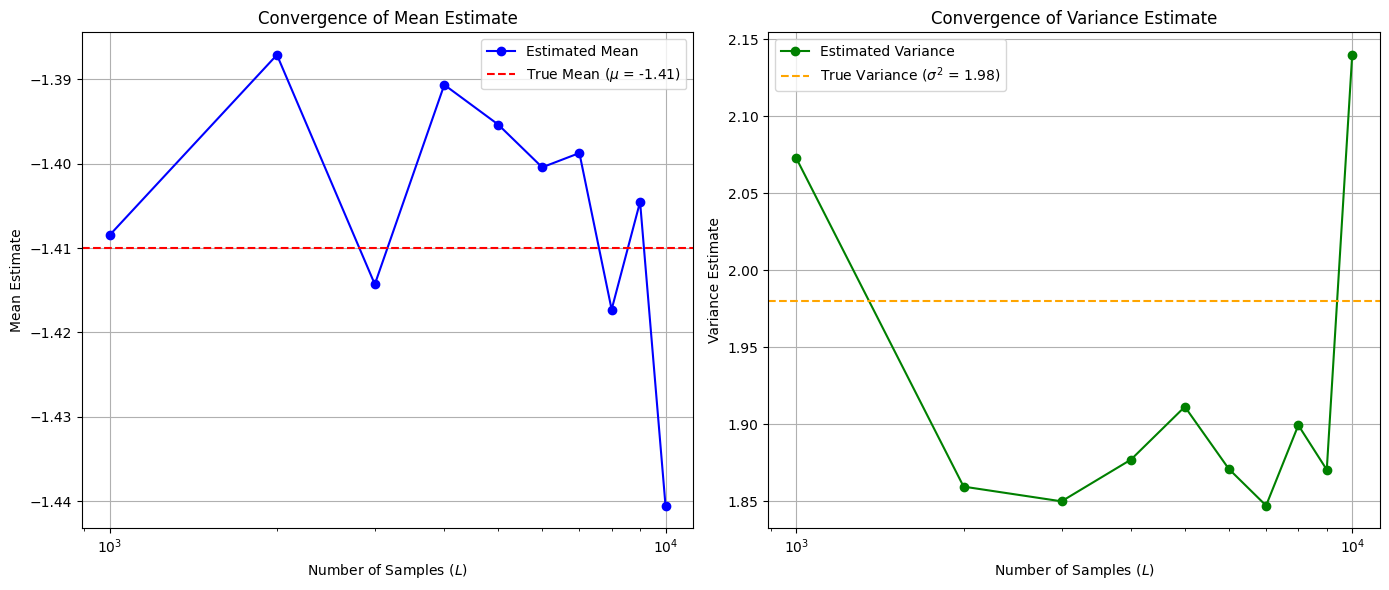

L=1000: Estimated Mean=-1.41, Estimated Variance=2.07
L=2000: Estimated Mean=-1.39, Estimated Variance=1.86
L=3000: Estimated Mean=-1.41, Estimated Variance=1.85
L=4000: Estimated Mean=-1.39, Estimated Variance=1.88
L=5000: Estimated Mean=-1.40, Estimated Variance=1.91
L=6000: Estimated Mean=-1.40, Estimated Variance=1.87
L=7000: Estimated Mean=-1.40, Estimated Variance=1.85
L=8000: Estimated Mean=-1.42, Estimated Variance=1.90
L=9000: Estimated Mean=-1.40, Estimated Variance=1.87
L=10000: Estimated Mean=-1.44, Estimated Variance=2.14


In [67]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_gaussian(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

def evaluate_johnsons(x):
    return (np.sqrt(2) / np.sqrt(np.pi * (1 + (x - 1)**2))) * \
           np.exp(-0.5 * (3 + 2 * np.arcsinh(x - 1))**2)

def estimate_stats(samples, weights):
    mu_hat = np.sum(weights * samples)
    sigma2_hat = np.sum(weights * (samples - mu_hat)**2)
    return mu_hat, sigma2_hat

# Analytical values for comparison
true_mean = -1.41
true_variance = 1.98

Ls = np.linspace(1000, 10000, 10).astype(int)
means = []
vars_ = []

proposal_mu = -2
proposal_sigma2 = 4
proposal_sigma = np.sqrt(proposal_sigma2)

for L in Ls:
    z = np.random.normal(loc=proposal_mu, scale=proposal_sigma, size=L)
    p = evaluate_johnsons(z)
    q = evaluate_gaussian(z, proposal_mu, proposal_sigma)

    weights = p / q

    weights /= np.sum(weights)

    mu_hat, sigma2_hat = estimate_stats(z, weights)
    means.append(mu_hat)
    vars_.append(sigma2_hat)

plt.figure(figsize=(14, 6))

# Subplot for Mean Estimation
plt.subplot(1, 2, 1)
plt.plot(Ls, means, marker='o', linestyle='-', color='blue', label='Estimated Mean')
plt.axhline(y=true_mean, color='red', linestyle='--', label=f'True Mean ($\mu$ = {true_mean})')
plt.xscale('log')
plt.xlabel('Number of Samples ($L$)')
plt.ylabel('Mean Estimate')
plt.title('Convergence of Mean Estimate')
plt.legend()
plt.grid(True)

# Subplot for Variance Estimation
plt.subplot(1, 2, 2)
plt.plot(Ls, vars_, marker='o', linestyle='-', color='green', label='Estimated Variance')
plt.axhline(y=true_variance, color='orange', linestyle='--', label=f'True Variance ($\sigma^2$ = {true_variance})')
plt.xscale('log')
plt.xlabel('Number of Samples ($L$)')
plt.ylabel('Variance Estimate')
plt.title('Convergence of Variance Estimate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

for L, mu_hat, var_hat in zip(Ls, means, vars_):
    print(f"L={L}: Estimated Mean={mu_hat:.2f}, Estimated Variance={var_hat:.2f}")

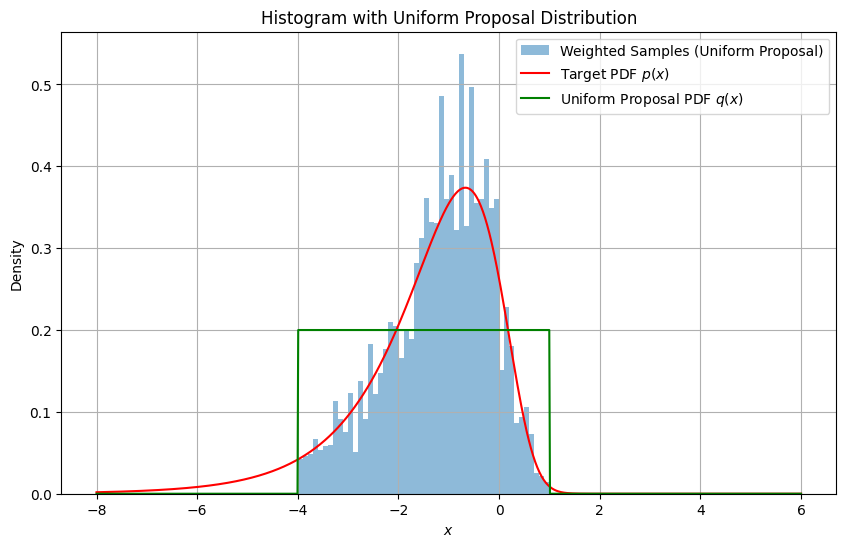

In [72]:
# 5

# Define the target PDF for plotting
x_plot = np.linspace(-8, 6, 1000)
p_x = evaluate_johnsons(x_plot)

# Define the uniform proposal PDF over [-4, 1]
def evaluate_uniform(x, a=-4, b=1):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

# Parameters for the uniform proposal
a, b = -4, 1
q_uniform_value = 1 / (b - a)  # 1/5 = 0.2
L = 1000

# Sample L points from the uniform proposal distribution q(x) ~ Uniform(a, b)
samples_uniform = np.random.uniform(low=a, high=b, size=L)

# Evaluate the target PDF p(x) at the sampled points
p_samples_uniform = evaluate_johnsons(samples_uniform)

# Evaluate the proposal PDF q(x) at the sampled points
q_samples_uniform = q_uniform_value  # 0.2

# Compute the importance weights w_i = p(x_i) / q(x_i)
weights_uniform = p_samples_uniform / q_samples_uniform

# Normalize the weights so that they sum to 1
weights_uniform /= np.sum(weights_uniform)

# Estimate mean and variance using the weighted samples
mu_hat_uniform, sigma2_hat_uniform = estimate_stats(samples_uniform, weights_uniform)

plt.figure(figsize=(10, 6))

plt.hist(samples_uniform, bins=50, density=True, weights=weights_uniform, alpha=0.5, label='Weighted Samples (Uniform Proposal)')

plt.plot(x_plot, p_x, 'r-', label='Target PDF $p(x)$')

q_uniform_plot = evaluate_uniform(x_plot, a, b)
plt.plot(x_plot, q_uniform_plot, 'g-', label='Uniform Proposal PDF $q(x)$')

plt.title('Histogram with Uniform Proposal Distribution')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()